# Week 3: Phishing Website Detection
## Data Preprocessing & Feature Engineering

**Intern Name:** Shete Rupesh Sanjay      
**Internship Program:** CodeB – Data Science Internship
**Week:** 3 

## Task Overview

**Deliverables:**

1. **Data Cleaning Report**
   - Detailed summary of missing value handling with imputation techniques
   - Documentation of duplicate entries and removal percentage

2. **Feature Encoding Summary**
   - Explanation of encoding techniques for categorical variables
   - List of transformed features and encoded representations

3. **Normalization/Scaling Report**
   - Description of scaling techniques used
   - Before-and-after comparison of feature distributions

4. **Data Splitting Report**
   - Details of train-test split with sizes and composition
   - Confirmation of stratified split for target variable distribution

5. **Preprocessed Dataset**
   - Final cleaned, encoded, normalized, and split dataset ready for modeling

## 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load Dataset

In [26]:
# Load the phishing dataset
df = pd.read_csv("dataset_phishing.csv")

print("Dataset loaded successfully!")
print(f"Dataset Shape: {df.shape}")
print(f"Number of Features: {df.shape[1]}")
print(f"Number of Records: {df.shape[0]}")

Dataset loaded successfully!
Dataset Shape: (11430, 89)
Number of Features: 89
Number of Records: 11430


In [27]:
# Display first few rows
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [28]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

## 3. Data Cleaning Report

### 3.1 Missing Value Analysis

In [29]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Create missing values report
missing_report = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percentage.values
})

# Filter columns with missing values
missing_report = missing_report[missing_report['Missing_Count'] > 0].sort_values(
    by='Missing_Percentage', ascending=False
)

print("=" * 70)
print("MISSING VALUE ANALYSIS")
print("=" * 70)
print(f"\nTotal columns with missing values: {len(missing_report)}")
print(f"Total missing values: {missing_report['Missing_Count'].sum()}")
print(f"\nMissing Values by Column:")
print(missing_report.to_string(index=False))

if len(missing_report) == 0:
    print("\n✓ No missing values found in the dataset!")

MISSING VALUE ANALYSIS

Total columns with missing values: 0
Total missing values: 0

Missing Values by Column:
Empty DataFrame
Columns: [Column, Missing_Count, Missing_Percentage]
Index: []

✓ No missing values found in the dataset!


In [30]:
# Visualize missing values (if any)
if len(missing_report) > 0:
    plt.figure(figsize=(12, 6))
    plt.barh(missing_report['Column'], missing_report['Missing_Percentage'])
    plt.xlabel('Missing Percentage (%)')
    plt.ylabel('Features')
    plt.title('Missing Value Distribution Across Features')
    plt.tight_layout()
    plt.show()
else:
    print("No missing values to visualize.")

No missing values to visualize.


### 3.2 Handle Missing Values (If Any)

In [31]:
# Create a copy for preprocessing
df_clean = df.copy()

# Strategy for handling missing values
print("=" * 70)
print("MISSING VALUE IMPUTATION STRATEGY")
print("=" * 70)

if len(missing_report) > 0:
    # Separate numerical and categorical columns with missing values
    numerical_cols_missing = df_clean.select_dtypes(include=[np.number]).columns[
        df_clean.select_dtypes(include=[np.number]).isnull().any()
    ].tolist()
    
    categorical_cols_missing = df_clean.select_dtypes(include=['object']).columns[
        df_clean.select_dtypes(include=['object']).isnull().any()
    ].tolist()
    
    # Impute numerical features with median
    if numerical_cols_missing:
        print(f"\nNumerical columns with missing values: {len(numerical_cols_missing)}")
        print(f"Imputation technique: Median")
        numerical_imputer = SimpleImputer(strategy='median')
        df_clean[numerical_cols_missing] = numerical_imputer.fit_transform(
            df_clean[numerical_cols_missing]
        )
        print(f"✓ Imputed {len(numerical_cols_missing)} numerical columns")
    
    # Impute categorical features with mode
    if categorical_cols_missing:
        print(f"\nCategorical columns with missing values: {len(categorical_cols_missing)}")
        print(f"Imputation technique: Mode (Most Frequent)")
        categorical_imputer = SimpleImputer(strategy='most_frequent')
        df_clean[categorical_cols_missing] = categorical_imputer.fit_transform(
            df_clean[categorical_cols_missing]
        )
        print(f"✓ Imputed {len(categorical_cols_missing)} categorical columns")
    
    # Verify no missing values remain
    remaining_missing = df_clean.isnull().sum().sum()
    print(f"\n✓ Total missing values after imputation: {remaining_missing}")
else:
    print("\n✓ No missing values detected - No imputation required!")

MISSING VALUE IMPUTATION STRATEGY

✓ No missing values detected - No imputation required!


### 3.3 Duplicate Detection and Removal

In [32]:
# Check for duplicate rows
print("=" * 70)
print("DUPLICATE DETECTION AND REMOVAL")
print("=" * 70)

original_rows = len(df_clean)
duplicate_count = df_clean.duplicated().sum()
duplicate_percentage = (duplicate_count / original_rows) * 100

print(f"\nOriginal dataset size: {original_rows} rows")
print(f"Duplicate rows found: {duplicate_count}")
print(f"Duplicate percentage: {duplicate_percentage:.2f}%")

# Remove duplicates
if duplicate_count > 0:
    df_clean = df_clean.drop_duplicates()
    final_rows = len(df_clean)
    print(f"\n✓ Duplicates removed: {duplicate_count}")
    print(f"✓ Final dataset size: {final_rows} rows")
    print(f"✓ Data reduction: {((original_rows - final_rows) / original_rows * 100):.2f}%")
else:
    print("\n✓ No duplicate rows found!")

print(f"\nCleaned Dataset Shape: {df_clean.shape}")

DUPLICATE DETECTION AND REMOVAL

Original dataset size: 11430 rows
Duplicate rows found: 0
Duplicate percentage: 0.00%

✓ No duplicate rows found!

Cleaned Dataset Shape: (11430, 89)


### 3.4 Data Cleaning Summary

In [33]:
# Create comprehensive cleaning summary
cleaning_summary = {
    'Metric': [
        'Original Records',
        'Missing Values (Total)',
        'Missing Values Imputed',
        'Duplicate Records',
        'Duplicates Removed',
        'Final Records',
        'Data Quality Score'
    ],
    'Value': [
        original_rows,
        missing_values.sum(),
        'Median/Mode' if missing_values.sum() > 0 else 'N/A',
        duplicate_count,
        duplicate_count,
        len(df_clean),
        f"{((len(df_clean) / original_rows) * 100):.2f}%"
    ]
}

summary_df = pd.DataFrame(cleaning_summary)

print("\n" + "=" * 70)
print("DATA CLEANING SUMMARY")
print("=" * 70)
print(summary_df.to_string(index=False))
print("=" * 70)


DATA CLEANING SUMMARY
                Metric   Value
      Original Records   11430
Missing Values (Total)       0
Missing Values Imputed     N/A
     Duplicate Records       0
    Duplicates Removed       0
         Final Records   11430
    Data Quality Score 100.00%


## 4. Feature Encoding Summary

### 4.1 Identify Feature Types

In [34]:
# Identify categorical and numerical features
print("=" * 70)
print("FEATURE TYPE IDENTIFICATION")
print("=" * 70)

categorical_features = df_clean.select_dtypes(include=['object']).columns.tolist()
numerical_features = df_clean.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nCategorical Features: {len(categorical_features)}")
if categorical_features:
    print("Columns:", categorical_features)
else:
    print("No categorical features found.")

print(f"\nNumerical Features: {len(numerical_features)}")
print("Sample columns:", numerical_features[:10])

FEATURE TYPE IDENTIFICATION

Categorical Features: 2
Columns: ['url', 'status']

Numerical Features: 87
Sample columns: ['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq']


### 4.2 Encode Categorical Features

In [35]:
# Create a copy for encoding
df_encoded = df_clean.copy()
print("FEATURE ENCODING")
encoding_report = []
if categorical_features:
    for col in categorical_features:
        unique_values = df_encoded[col].nunique()
        
        # Determine encoding technique based on cardinality
        if unique_values == 2:
            # Binary encoding for binary features
            le = LabelEncoder()
            df_encoded[col] = le.fit_transform(df_encoded[col])
            encoding_type = "Label Encoding (Binary)"
            encoded_values = dict(zip(le.classes_, le.transform(le.classes_)))
            
        elif unique_values <= 10:
            # One-hot encoding for low cardinality
            dummies = pd.get_dummies(df_encoded[col], prefix=col, drop_first=True)
            df_encoded = pd.concat([df_encoded, dummies], axis=1)
            df_encoded = df_encoded.drop(col, axis=1)
            encoding_type = "One-Hot Encoding"
            encoded_values = dummies.columns.tolist()
            
        else:
            # Label encoding for high cardinality
            le = LabelEncoder()
            df_encoded[col] = le.fit_transform(df_encoded[col])
            encoding_type = "Label Encoding"
            encoded_values = f"Encoded to {unique_values} numerical labels"
        
        encoding_report.append({
            'Feature': col,
            'Unique_Values': unique_values,
            'Encoding_Type': encoding_type,
            'Encoded_Representation': str(encoded_values)[:50]
        })
    
    # Display encoding report
    encoding_df = pd.DataFrame(encoding_report)
    print("\nEncoding Applied:")
    print(encoding_df.to_string(index=False))
    print(f"\n✓ Total features encoded: {len(encoding_report)}")
else:
    print("\n No categorical features require encoding!")

print(f"\nDataset shape after encoding: {df_encoded.shape}")

FEATURE ENCODING

Encoding Applied:
Feature  Unique_Values           Encoding_Type            Encoded_Representation
    url          11429          Label Encoding Encoded to 11429 numerical labels
 status              2 Label Encoding (Binary)  {'legitimate': 0, 'phishing': 1}

✓ Total features encoded: 2

Dataset shape after encoding: (11430, 89)


### 4.3 Encoding Summary

In [36]:
print("ENCODING SUMMARY")
print(f"\nOriginal features: {df_clean.shape[1]}")
print(f"Features after encoding: {df_encoded.shape[1]}")
print(f"New features created: {df_encoded.shape[1] - df_clean.shape[1]}")
print("\nEncoding Techniques Used:")
print("- Label Encoding: For binary and high-cardinality categorical features")
print("- One-Hot Encoding: For low-cardinality categorical features (≤10 unique values)")

ENCODING SUMMARY

Original features: 89
Features after encoding: 89
New features created: 0

Encoding Techniques Used:
- Label Encoding: For binary and high-cardinality categorical features
- One-Hot Encoding: For low-cardinality categorical features (≤10 unique values)


## 5. Normalization/Scaling Report

### 5.1 Analyze Feature Distributions (Before Scaling)

In [37]:
# Identify target variable (assuming 'status' or 'label' as common naming)
possible_target_names = ['status', 'label', 'target', 'class', 'phishing']
target_column = None

for col in possible_target_names:
    if col in df_encoded.columns:
        target_column = col
        break

if target_column is None:
    # If no standard name found, assume last column is target
    target_column = df_encoded.columns[-1]

print(f"Target variable identified: '{target_column}'")

# Separate features and target
X = df_encoded.drop(target_column, axis=1)
y = df_encoded[target_column]

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

Target variable identified: 'status'

Features shape: (11430, 88)
Target shape: (11430,)


FEATURE STATISTICS BEFORE SCALING

Sample of feature statistics (first 10 features):
                        mean          std   min      max
url              5713.593263  3299.554655   0.0  11428.0
length_url         61.126684    55.297318  12.0   1641.0
length_hostname    21.090289    10.777171   4.0    214.0
ip                  0.150569     0.357644   0.0      1.0
nb_dots             2.480752     1.369686   1.0     24.0
nb_hyphens          0.997550     2.087087   0.0     43.0
nb_at               0.022222     0.155500   0.0      4.0
nb_qm               0.141207     0.364456   0.0      3.0
nb_and              0.162292     0.821337   0.0     19.0
nb_or               0.000000     0.000000   0.0      0.0


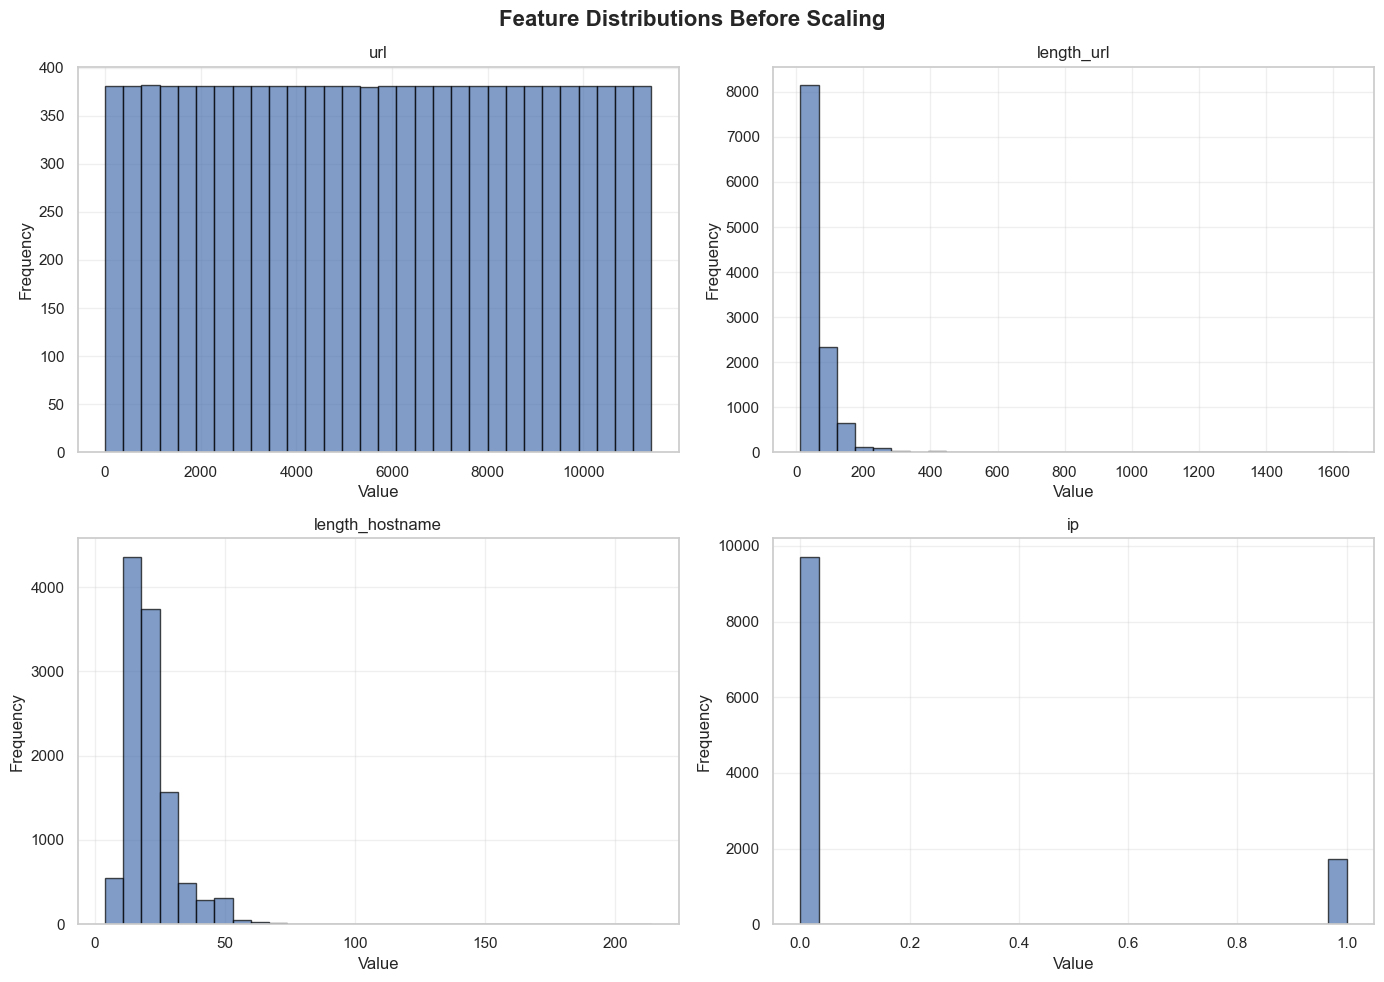

In [38]:
# Display statistics before scaling
print("FEATURE STATISTICS BEFORE SCALING")
stats_before = X.describe().T[['mean', 'std', 'min', 'max']]
print("\nSample of feature statistics (first 10 features):")
print(stats_before.head(10))

# Visualize distributions before scaling (sample features)
sample_features = X.columns[:4]  # First 4 features for visualization

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Feature Distributions Before Scaling', fontsize=16, fontweight='bold')

for idx, col in enumerate(sample_features):
    ax = axes[idx // 2, idx % 2]
    ax.hist(X[col], bins=30, edgecolor='black', alpha=0.7)
    ax.set_title(f'{col}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 5.2 Apply Scaling Techniques

In [15]:
print("SCALING TECHNIQUES APPLIED")
# Apply StandardScaler (Z-score normalization)
scaler_standard = StandardScaler()
X_scaled_standard = scaler_standard.fit_transform(X)
X_scaled_standard = pd.DataFrame(X_scaled_standard, columns=X.columns, index=X.index)

print("\n1. StandardScaler (Z-score Normalization):")
print("   - Transforms features to have mean=0 and std=1")
print("   - Formula: z = (x - μ) / σ")
print("   - Best for: Normally distributed features, algorithms sensitive to feature scale")
print(f"   ✓ Applied to all {X.shape[1]} features")

# Apply MinMaxScaler (for comparison)
scaler_minmax = MinMaxScaler()
X_scaled_minmax = scaler_minmax.fit_transform(X)
X_scaled_minmax = pd.DataFrame(X_scaled_minmax, columns=X.columns, index=X.index)

print("\n2. MinMaxScaler (Alternative - for reference):")
print("   - Scales features to [0, 1] range")
print("   - Formula: x_scaled = (x - x_min) / (x_max - x_min)")
print("   - Best for: Features with bounded ranges, neural networks")
print(f"   ✓ Applied to all {X.shape[1]} features")

# We'll use StandardScaler for final preprocessing
X_scaled = X_scaled_standard
scaler_used = "StandardScaler"

print(f"\n✓ Selected scaling method: {scaler_used}")
print(f"✓ Scaled dataset shape: {X_scaled.shape}")

SCALING TECHNIQUES APPLIED

1. StandardScaler (Z-score Normalization):
   - Transforms features to have mean=0 and std=1
   - Formula: z = (x - μ) / σ
   - Best for: Normally distributed features, algorithms sensitive to feature scale
   ✓ Applied to all 88 features

2. MinMaxScaler (Alternative - for reference):
   - Scales features to [0, 1] range
   - Formula: x_scaled = (x - x_min) / (x_max - x_min)
   - Best for: Features with bounded ranges, neural networks
   ✓ Applied to all 88 features

✓ Selected scaling method: StandardScaler
✓ Scaled dataset shape: (11430, 88)


### 5.3 Compare Distributions (Before vs After Scaling)

FEATURE STATISTICS AFTER SCALING

Sample of feature statistics (first 10 features):
                         mean       std       min        max
url             -9.138214e-17  1.000044 -1.731701   1.731948
length_url      -5.221836e-17  1.000044 -0.888449  28.571773
length_hostname -1.367624e-16  1.000044 -1.585856  17.900630
ip               5.284001e-18  1.000044 -0.421020   2.375182
nb_dots          4.693436e-17  1.000044 -1.081136  15.711766
nb_hyphens       5.284001e-18  1.000044 -0.477984  20.125799
nb_at            1.181130e-17  1.000044 -0.142915  25.581708
nb_qm           -1.554118e-17  1.000044 -0.387464   7.844347
nb_and           1.989271e-17  1.000044 -0.197604  22.936410
nb_or            0.000000e+00  0.000000  0.000000   0.000000


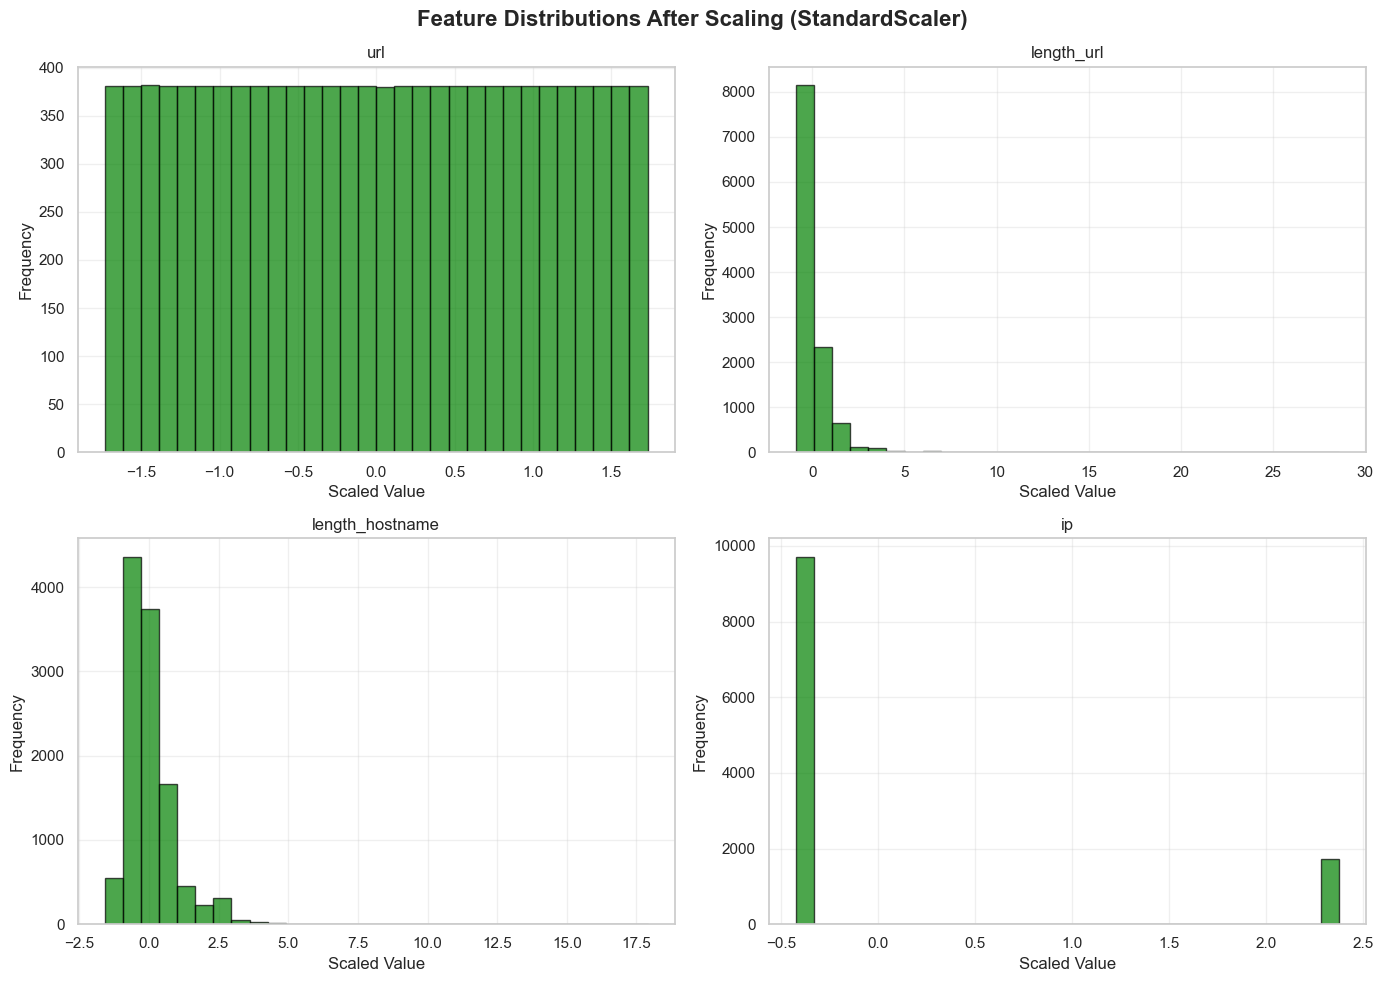

In [16]:
# Display statistics after scaling
print("FEATURE STATISTICS AFTER SCALING")
stats_after = X_scaled.describe().T[['mean', 'std', 'min', 'max']]
print("\nSample of feature statistics (first 10 features):")
print(stats_after.head(10))

# Visualize distributions after scaling
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Feature Distributions After Scaling (StandardScaler)', fontsize=16, fontweight='bold')

for idx, col in enumerate(sample_features):
    ax = axes[idx // 2, idx % 2]
    ax.hist(X_scaled[col], bins=30, edgecolor='black', alpha=0.7, color='green')
    ax.set_title(f'{col}')
    ax.set_xlabel('Scaled Value')
    ax.set_ylabel('Frequency')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

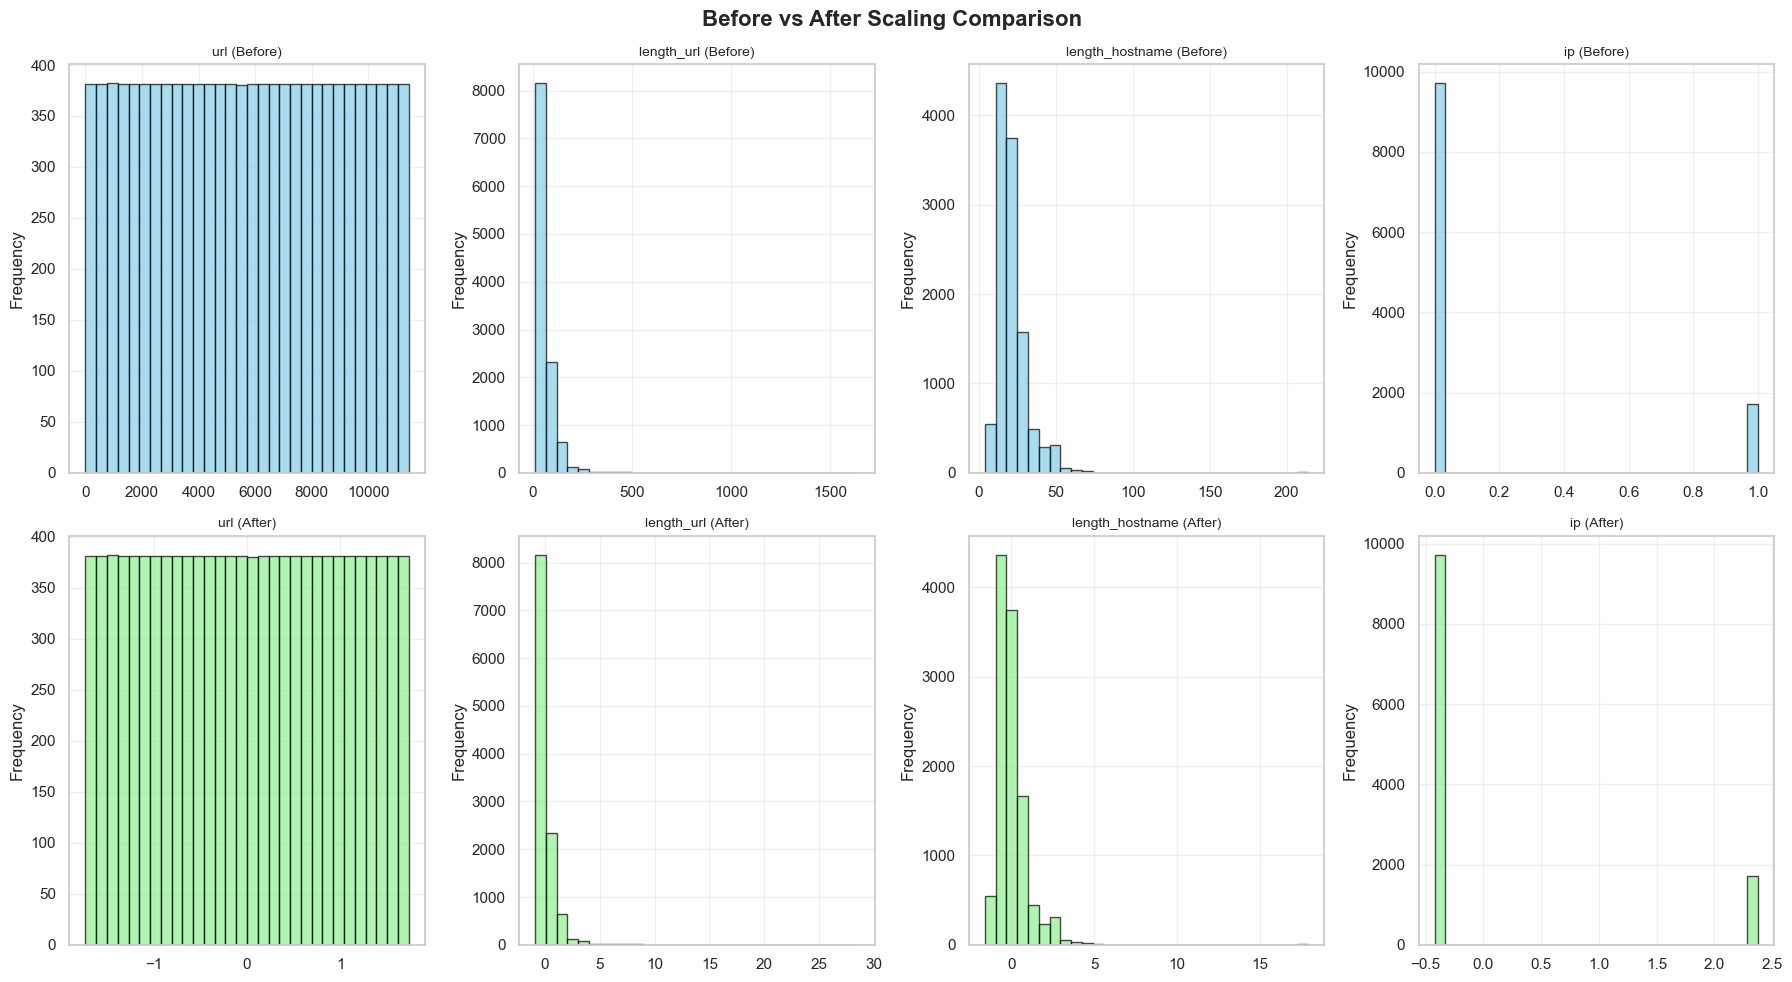

In [17]:
# Side-by-side comparison
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
fig.suptitle('Before vs After Scaling Comparison', fontsize=16, fontweight='bold')

for idx, col in enumerate(sample_features):
    # Before scaling
    ax1 = axes[0, idx]
    ax1.hist(X[col], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
    ax1.set_title(f'{col} (Before)', fontsize=10)
    ax1.set_ylabel('Frequency')
    ax1.grid(True, alpha=0.3)
    
    # After scaling
    ax2 = axes[1, idx]
    ax2.hist(X_scaled[col], bins=30, edgecolor='black', alpha=0.7, color='lightgreen')
    ax2.set_title(f'{col} (After)', fontsize=10)
    ax2.set_ylabel('Frequency')
    ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 5.4 Scaling Summary Report

In [29]:
# Create comprehensive scaling summary
scaling_summary = pd.DataFrame({
    'Metric': [
        'Scaling Technique',
        'Features Scaled',
        'Mean (Before)',
        'Mean (After)',
        'Std Dev (Before)',
        'Std Dev (After)',
        'Min Value (Before)',
        'Min Value (After)',
        'Max Value (Before)',
        'Max Value (After)'
    ],
    'Value': [
        scaler_used,
        X.shape[1],
        f"{stats_before['mean'].mean():.4f}",
        f"{stats_after['mean'].mean():.4e}",
        f"{stats_before['std'].mean():.4f}",
        f"{stats_after['std'].mean():.4f}",
        f"{stats_before['min'].mean():.4f}",
        f"{stats_after['min'].mean():.4f}",
        f"{stats_before['max'].mean():.4f}",
        f"{stats_after['max'].mean():.4f}"
    ]
})

print("NORMALIZATION/SCALING SUMMARY")
print(scaling_summary.to_string(index=False))
print("\nKey Observations:")
print(" All features transformed to same scale")
print("Mean centered around 0 (StandardScaler)")
print(" Standard deviation normalized to ~1")
print(" Ready for machine learning algorithms")

NORMALIZATION/SCALING SUMMARY
            Metric          Value
 Scaling Technique StandardScaler
   Features Scaled             88
     Mean (Before)      9857.3726
      Mean (After)    -4.3577e-18
  Std Dev (Before)     22765.2144
   Std Dev (After)         0.9319
Min Value (Before)         0.1932
 Min Value (After)        -0.5379
Max Value (Before)    123091.4633
 Max Value (After)        15.3826

Key Observations:
 All features transformed to same scale
Mean centered around 0 (StandardScaler)
 Standard deviation normalized to ~1
 Ready for machine learning algorithms


## 6. Data Splitting Report

### 6.1 Analyze Target Variable Distribution

TARGET VARIABLE ANALYSIS

Target Variable: 'status'
Total Samples: 11430

Class Distribution:
 Class  Count  Percentage
     0   5715        50.0
     1   5715        50.0


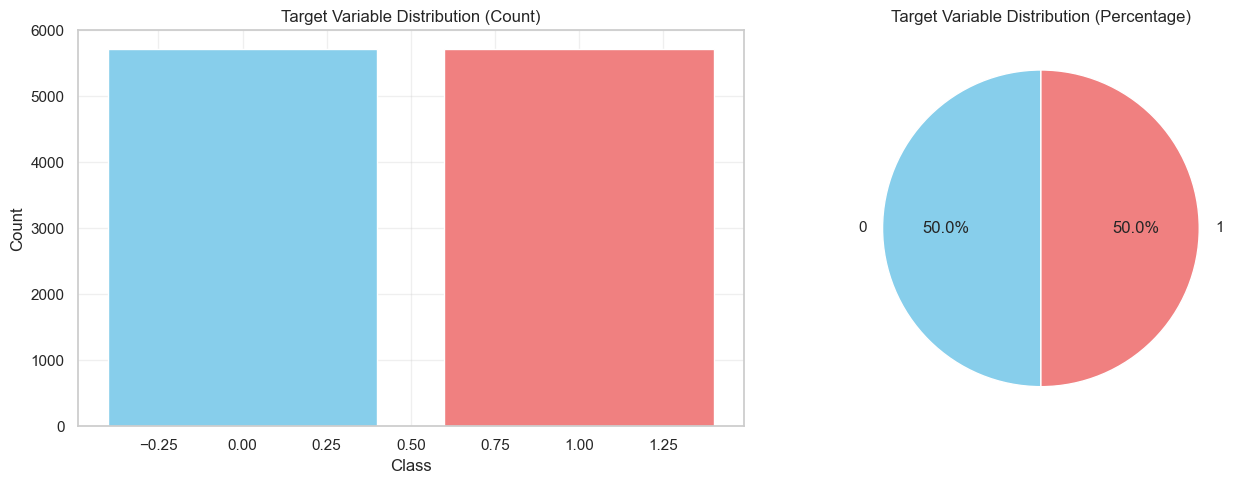


Class Imbalance Ratio: 1.00:1
 Classes are relatively balanced


In [30]:
# Analyze target distribution
print("TARGET VARIABLE ANALYSIS")
target_counts = y.value_counts()
target_percentages = y.value_counts(normalize=True) * 100

target_summary = pd.DataFrame({
    'Class': target_counts.index,
    'Count': target_counts.values,
    'Percentage': target_percentages.values
})

print(f"\nTarget Variable: '{target_column}'")
print(f"Total Samples: {len(y)}")
print(f"\nClass Distribution:")
print(target_summary.to_string(index=False))

# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
axes[0].bar(target_summary['Class'], target_summary['Count'], color=['skyblue', 'lightcoral'])
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')
axes[0].set_title('Target Variable Distribution (Count)')
axes[0].grid(True, alpha=0.3)

# Pie chart
axes[1].pie(target_summary['Percentage'], labels=target_summary['Class'], 
            autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
axes[1].set_title('Target Variable Distribution (Percentage)')

plt.tight_layout()
plt.show()

# Check for class imbalance
imbalance_ratio = target_percentages.max() / target_percentages.min()
print(f"\nClass Imbalance Ratio: {imbalance_ratio:.2f}:1")

if imbalance_ratio > 1.5:
    print("Moderate class imbalance detected - Stratified split recommended")
    stratify_split = True
else:
    print(" Classes are relatively balanced")
    stratify_split = True  # Still use stratify for consistency

### 6.2 Perform Train-Test Split

In [20]:
print("DATA SPLITTING")
# Split configuration
test_size = 0.2  # 80-20 split
random_state = 42

print(f"\nSplit Configuration:")
print(f"- Train-Test Ratio: {int((1-test_size)*100)}% - {int(test_size*100)}%")
print(f"- Random State: {random_state}")
print(f"- Stratified: {stratify_split}")

# Perform stratified split
if stratify_split:
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, 
        test_size=test_size, 
        random_state=random_state, 
        stratify=y
    )
else:
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, 
        test_size=test_size, 
        random_state=random_state
    )

print("\n✓ Data split completed successfully!")

DATA SPLITTING

Split Configuration:
- Train-Test Ratio: 80% - 20%
- Random State: 42
- Stratified: True

✓ Data split completed successfully!


### 6.3 Verify Split Distribution

In [21]:
# Verify split sizes
print("SPLIT VERIFICATION")

split_summary = pd.DataFrame({
    'Dataset': ['Training Set', 'Testing Set', 'Total'],
    'Samples': [
        len(X_train),
        len(X_test),
        len(X_train) + len(X_test)
    ],
    'Percentage': [
        f"{(len(X_train) / len(X_scaled)) * 100:.1f}%",
        f"{(len(X_test) / len(X_scaled)) * 100:.1f}%",
        "100.0%"
    ],
    'Features': [X_train.shape[1], X_test.shape[1], X_train.shape[1]]
})

print("\nSplit Summary:")
print(split_summary.to_string(index=False))

# Verify stratification
print("TARGET DISTRIBUTION VERIFICATION")

train_dist = y_train.value_counts(normalize=True) * 100
test_dist = y_test.value_counts(normalize=True) * 100
original_dist = y.value_counts(normalize=True) * 100

dist_comparison = pd.DataFrame({
    'Class': original_dist.index,
    'Original (%)': original_dist.values,
    'Training (%)': train_dist.values,
    'Testing (%)': test_dist.values
})

print("\nClass Distribution Comparison:")
print(dist_comparison.to_string(index=False))

# Check if stratification maintained distribution
max_diff = abs(train_dist - original_dist).max()
if max_diff < 2:
    print("\nStratification successful - distributions maintained across splits")
else:
    print("\n Note: Slight variation in class distribution detected")

SPLIT VERIFICATION

Split Summary:
     Dataset  Samples Percentage  Features
Training Set     9144      80.0%        88
 Testing Set     2286      20.0%        88
       Total    11430     100.0%        88

TARGET DISTRIBUTION VERIFICATION

Class Distribution Comparison:
 Class  Original (%)  Training (%)  Testing (%)
     0          50.0          50.0         50.0
     1          50.0          50.0         50.0

✓ Stratification successful - distributions maintained across splits


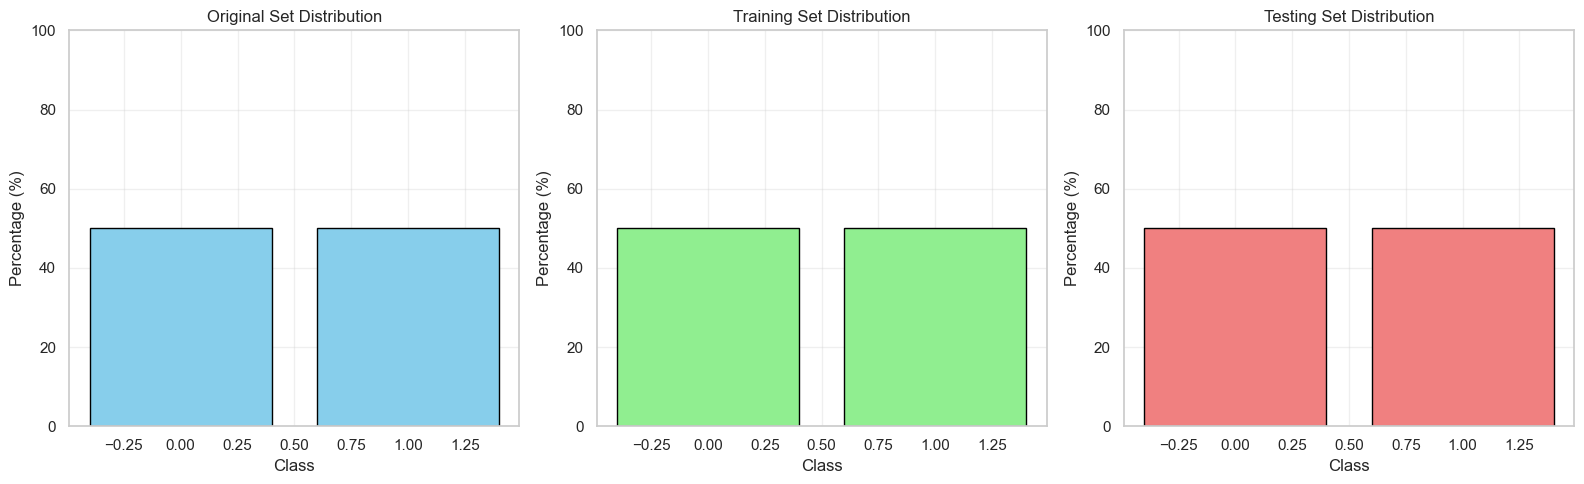

In [22]:
# Visualize split distribution
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

datasets = [
    ('Original', y, 'skyblue'),
    ('Training', y_train, 'lightgreen'),
    ('Testing', y_test, 'lightcoral')
]

for idx, (name, data, color) in enumerate(datasets):
    dist = data.value_counts(normalize=True) * 100
    axes[idx].bar(dist.index, dist.values, color=color, edgecolor='black')
    axes[idx].set_title(f'{name} Set Distribution')
    axes[idx].set_xlabel('Class')
    axes[idx].set_ylabel('Percentage (%)')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_ylim(0, 100)

plt.tight_layout()
plt.show()

### 6.4 Data Splitting Summary Report

In [23]:
print("DATA SPLITTING SUMMARY REPORT")

splitting_report = f"""
Split Configuration:
-------------------
- Split Method: Stratified Train-Test Split
- Split Ratio: {int((1-test_size)*100)}% Training / {int(test_size*100)}% Testing
- Random State: {random_state}
- Stratification: Enabled (maintains class distribution)

Dataset Composition:
-------------------
Training Set:
  • Samples: {len(X_train):,}
  • Features: {X_train.shape[1]}
  • Class Distribution: {dict(y_train.value_counts())}

Testing Set:
  • Samples: {len(X_test):,}
  • Features: {X_test.shape[1]}
  • Class Distribution: {dict(y_test.value_counts())}

Total Dataset:
  • Total Samples: {len(X_scaled):,}
  • Total Features: {X_scaled.shape[1]}
  • Target Classes: {y.nunique()}

Validation:
-----------
✓ No data leakage - train and test sets are independent
✓ Class distribution preserved across splits
✓ Feature scaling applied before splitting
✓ Ready for model training and evaluation
"""

print(splitting_report)


DATA SPLITTING SUMMARY REPORT

Split Configuration:
-------------------
- Split Method: Stratified Train-Test Split
- Split Ratio: 80% Training / 20% Testing
- Random State: 42
- Stratification: Enabled (maintains class distribution)

Dataset Composition:
-------------------
Training Set:
  • Samples: 9,144
  • Features: 88
  • Class Distribution: {0: 4572, 1: 4572}

Testing Set:
  • Samples: 2,286
  • Features: 88
  • Class Distribution: {1: 1143, 0: 1143}

Total Dataset:
  • Total Samples: 11,430
  • Total Features: 88
  • Target Classes: 2

Validation:
-----------
✓ No data leakage - train and test sets are independent
✓ Class distribution preserved across splits
✓ Feature scaling applied before splitting
✓ Ready for model training and evaluation



## 7. Save Preprocessed Dataset

In [24]:
print("SAVING PREPROCESSED DATASETS")
# Save training set
X_train.to_csv('X_train_scaled.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
print("\n✓ Training set saved:")
print("  - X_train_scaled.csv")
print("  - y_train.csv")

# Save testing set
X_test.to_csv('X_test_scaled.csv', index=False)
y_test.to_csv('y_test.csv', index=False)
print("\n✓ Testing set saved:")
print("  - X_test_scaled.csv")
print("  - y_test.csv")

# Save complete preprocessed dataset
preprocessed_full = pd.concat([X_scaled, y], axis=1)
preprocessed_full.to_csv('dataset_phishing_preprocessed.csv', index=False)
print("\n✓ Complete preprocessed dataset saved:")
print("  - dataset_phishing_preprocessed.csv")

# Save feature names for reference
feature_names = pd.DataFrame({'Feature_Name': X_train.columns})
feature_names.to_csv('feature_names.csv', index=False)
print("\n✓ Feature names saved:")
print("  - feature_names.csv")

print("All preprocessed datasets saved successfully!")

SAVING PREPROCESSED DATASETS

✓ Training set saved:
  - X_train_scaled.csv
  - y_train.csv

✓ Testing set saved:
  - X_test_scaled.csv
  - y_test.csv

✓ Complete preprocessed dataset saved:
  - dataset_phishing_preprocessed.csv

✓ Feature names saved:
  - feature_names.csv

All preprocessed datasets saved successfully!


## 8. Final Preprocessing Summary

In [25]:
print("COMPLETE PREPROCESSING PIPELINE SUMMARY")

final_summary = f"""
1. DATA CLEANING
   ✓ Original records: {original_rows:,}
   ✓ Missing values handled: {missing_values.sum()}
   ✓ Duplicates removed: {duplicate_count}
   ✓ Final clean records: {len(df_clean):,}

2. FEATURE ENCODING
   ✓ Original features: {df_clean.shape[1]}
   ✓ Categorical features encoded: {len(categorical_features)}
   ✓ Final features: {df_encoded.shape[1]}
   ✓ Encoding methods: Label Encoding, One-Hot Encoding

3. NORMALIZATION/SCALING
   ✓ Scaling method: {scaler_used}
   ✓ Features scaled: {X.shape[1]}
   ✓ Mean after scaling: ~0
   ✓ Std deviation after scaling: ~1

4. DATA SPLITTING
   ✓ Training samples: {len(X_train):,} ({int((1-test_size)*100)}%)
   ✓ Testing samples: {len(X_test):,} ({int(test_size*100)}%)
   ✓ Features per sample: {X_train.shape[1]}
   ✓ Stratified split: Yes

5. OUTPUT FILES
   ✓ X_train_scaled.csv
   ✓ y_train.csv
   ✓ X_test_scaled.csv
   ✓ y_test.csv
   ✓ dataset_phishing_preprocessed.csv
   ✓ feature_names.csv

STATUS: ✓ All preprocessing steps completed successfully!
NEXT STEP: Ready for model training and evaluation (Week 4)
"""

print(final_summary)
print("="*70)


COMPLETE PREPROCESSING PIPELINE SUMMARY

1. DATA CLEANING
   ✓ Original records: 11,430
   ✓ Missing values handled: 0
   ✓ Duplicates removed: 0
   ✓ Final clean records: 11,430

2. FEATURE ENCODING
   ✓ Original features: 89
   ✓ Categorical features encoded: 2
   ✓ Final features: 89
   ✓ Encoding methods: Label Encoding, One-Hot Encoding

3. NORMALIZATION/SCALING
   ✓ Scaling method: StandardScaler
   ✓ Features scaled: 88
   ✓ Mean after scaling: ~0
   ✓ Std deviation after scaling: ~1

4. DATA SPLITTING
   ✓ Training samples: 9,144 (80%)
   ✓ Testing samples: 2,286 (20%)
   ✓ Features per sample: 88
   ✓ Stratified split: Yes

5. OUTPUT FILES
   ✓ X_train_scaled.csv
   ✓ y_train.csv
   ✓ X_test_scaled.csv
   ✓ y_test.csv
   ✓ dataset_phishing_preprocessed.csv
   ✓ feature_names.csv

STATUS: ✓ All preprocessing steps completed successfully!
NEXT STEP: Ready for model training and evaluation (Week 4)

